In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from copy import deepcopy
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## **`Data Dictionary:`**

`1. Unnamed 0:` Index of the dataset

`2. Email_hash:` Anonymised Personal Identifiable Information (PII)

`3. Company_hash:` Current employer of the learner

`4. orgyear:` Employment start date

`5. CTC:` Current CTC

`6. Job_position:` Job profile in the company

`7. CTC_updated_year:` Year in which CTC got updated (Yearly increments, Promotions)

## **`Problem Statement:`**
### Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

### You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.


## **`Data types of the variables:`**

#### `1. Unnamed: 0:` int64
#### `2. company_hash:` object
#### `3. email_hash:` object
#### `4. orgyear:` float64
#### `5. ctc:` int64
#### `6. job_position:` object
#### `7. ctc_updated_year:` float64

In [4]:
df.dtypes

Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

## **`Missing Value Detection:`**
#### `1. Unnamed: 0 -` No missing values
#### `2. company_hash -` 44 missing values
#### `3. email_hash -` No missing values
#### `4. orgyear -` 86 missing values
#### `5. ctc -` No missing values
#### `6. job_position -` 52562 missing values
#### `7. ctc_updated_year -` No missing values

In [5]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [6]:
df.shape[0]

205843

## **`Statistical Summary`**
### **`1. Unnamed: 0 -`** There are 205843 unique values.
### **`2. company_hash -`** There are 37299 unique values in "company_hash" column which means that our database has the data of 37299 companies.
### **`3. email_hash -`** There are 153443 unique values in "email_hash" column which means that our database has the data of 153443 employees.
### **`4. orgyear -`** Minimum value is 0 (outliers) and maximum value is 20165 (outliers)
### **`5. ctc -`** Minimum value of ctc is 2 (outliers), 25th percentile value is 530000, median value is 950000, 75th percentile value is 1700000,and maximum value is 10^9.
### **`6. job_position -`** There are 1017 unique values in job_position. The most frequent one is Backend Engineer with a frequency of 43554 which is about ~20% of the total data.
### **`7. ctc_updated_year -`** Minimum value is 2015 and maximum value is 2021.

In [7]:
df.astype({'Unnamed: 0': 'str'}).describe(include = 'all')

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205843,205799,205843,205757.000000,2.058430e+05,153281,205843.000000
unique,205843,37299,153443,NaN,NaN,1017,NaN
top,0,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,1,8337,10,NaN,NaN,43554,NaN
mean,NaN,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,NaN,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,NaN,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,NaN,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,NaN,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


In [8]:
52562/df.shape[0]

0.255349951176382

## **`Missing Value Treatment`**
#### **`1. company_hash -`** There are 44 missing values in **company_hash** column. As these are only 0.02 % of the total data. So we'll drop these datapoints.
#### **`2. orgyear -`** There are 86 missing values in **orgyear** column. As these are only 0.04 % of the total data. So we'll drop these datapoints.
#### **`3. job_position -`** As there are 52562 missing values in **job_position** column which is about ~25 % of the total data, so we can't just drop these datapoits. We'll replace this missing values by **`"Missing"`**

In [9]:
df = df[(~df['company_hash'].isnull()) & (~df['orgyear'].isnull())]
df.fillna({'job_position': 'Missing'}, inplace = True)

In [10]:
df.isnull().sum()

Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

## **`Duplicate Value Check`**

#### Let's drop column **`"Unnamed: 0"`** and then check duplicate datapoints

In [11]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df[df.duplicated(keep = False)].sort_values(list(df.columns))

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
50358,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,Missing,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,Missing,2019.0
86378,2020,77a5cecd2ed9bb764df8bf6da78a0ae2aef97fc87e913e...,2020.0,1000000,Missing,2019.0
196971,2020,77a5cecd2ed9bb764df8bf6da78a0ae2aef97fc87e913e...,2020.0,1000000,Missing,2019.0
45633,2020,b6a63b76c3a1a395f7c3d509f2760d83aeb6e8c53db2b1...,2020.0,2700000,Missing,2019.0
...,...,...,...,...,...,...
138371,xicxv,d0e72d551c69a2f9d96914515aeef797f4989b54c90ef0...,2014.0,1200000,FullStack Engineer,2019.0
72896,xznqvrxzp,c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...,2016.0,6730000,Backend Engineer,2019.0
182531,xznqvrxzp,c2c34a82a91169e2523727f7f15a4cc64f973ccb895b69...,2016.0,6730000,Backend Engineer,2019.0
24794,xzzgcvwwtq,5d00f5560a82d5ed91708273f9190499a6405abff35ab1...,2020.0,1300000,Missing,2019.0


In [12]:
## Dropping the duplicate datapoints
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

## **`Feature Creation - "Years of Experience"`**

In [13]:
df['experience_in_years'] = df['ctc_updated_year'] - df['orgyear']

## **`Univariate Analysis:`**

### **`1. company_hash:`** There are 37274 unique values in **`"company_hash"`** feature. Distribution of top 10 most frequent ones are plotted below.

In [14]:
df['company_hash'].nunique()

37274

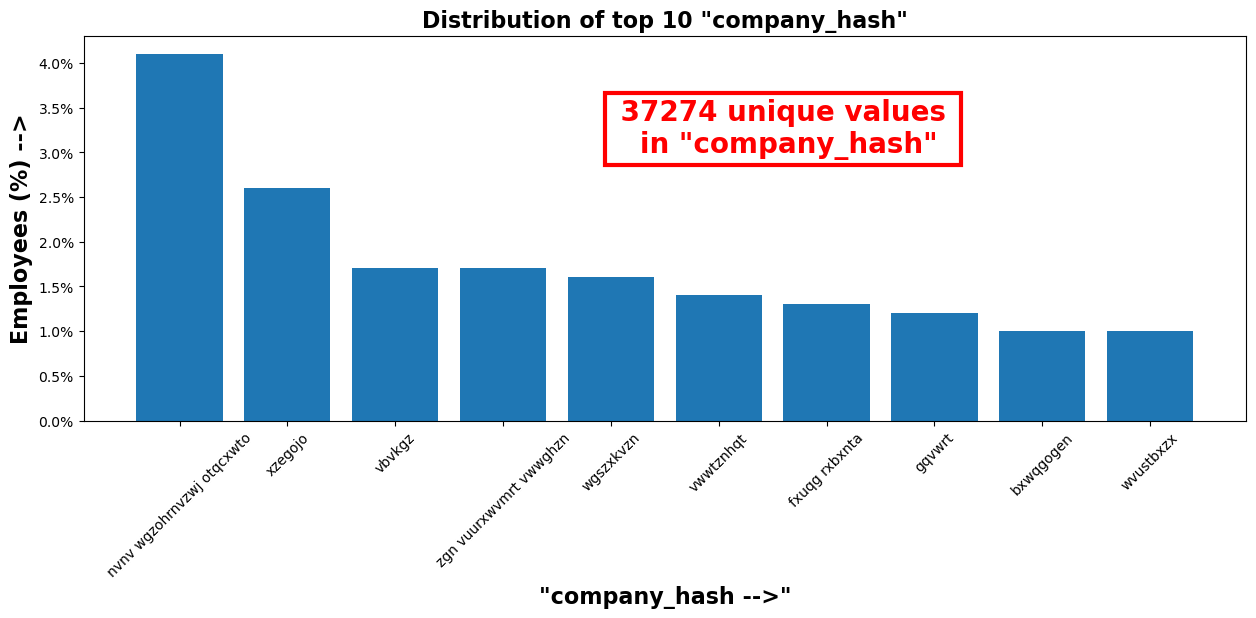

In [15]:
plt.figure(figsize = (15, 5))
plt.bar(x = df['company_hash'].value_counts(normalize = True).index[:10],
        height = (df['company_hash'].value_counts(normalize = True).round(3) * 100)[:10])
plt.xticks(rotation = 45)
plt.yticks(ticks = np.arange(0, 4.5, 0.5), labels = [str(i) + '%' for i in np.arange(0, 4.5, 0.5)])
plt.text(x = 4, y = 3, s = f' {df["company_hash"].nunique()} unique values \n   in "company_hash"',
         fontdict = {'color':'red','size':20, 'weight': 'bold'},
         bbox=dict(facecolor='none', edgecolor='red', linewidth= 3))
plt.ylabel('Employees (%) -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('"company_hash -->"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.title('Distribution of top 10 "company_hash"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

### **`2. email_hash:`** There are 153333 unique values in **`"email_hash"`** feature.

In [16]:
df['email_hash'].nunique()

153333

### **`3. orgyear:`** There are 77 unique values in **`"orgyear"`** feature. There are outliers (via human error) in `"orgyear"` which have few values on the lower side like 0, 1, 2, 1900 etc and few on the higher side like 2101, 2106 etc which are clearly not possible. So we'll simply drop them.
### As we can see from the distribution plotted below, the median value of **`"orgyear"`** is 2016 and the distribution is left skewed which means that few people have very high work experience.

In [17]:
print(f"{df['orgyear'].nunique()} unique values in 'orgyear' columns")

77 unique values in 'orgyear' columns


In [18]:
print(f"Outliers --> {sorted(df.loc[(df['orgyear'] <= 1900) | (df['orgyear'] > 2023), 'orgyear'].unique())}")

Outliers --> [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 38.0, 83.0, 91.0, 200.0, 201.0, 206.0, 208.0, 209.0, 1900.0, 2024.0, 2025.0, 2026.0, 2027.0, 2028.0, 2029.0, 2031.0, 2101.0, 2106.0, 2107.0, 2204.0, 20165.0]


In [19]:
df = df[(df['orgyear'] > 1900) & (df['orgyear'] <= 2023)]

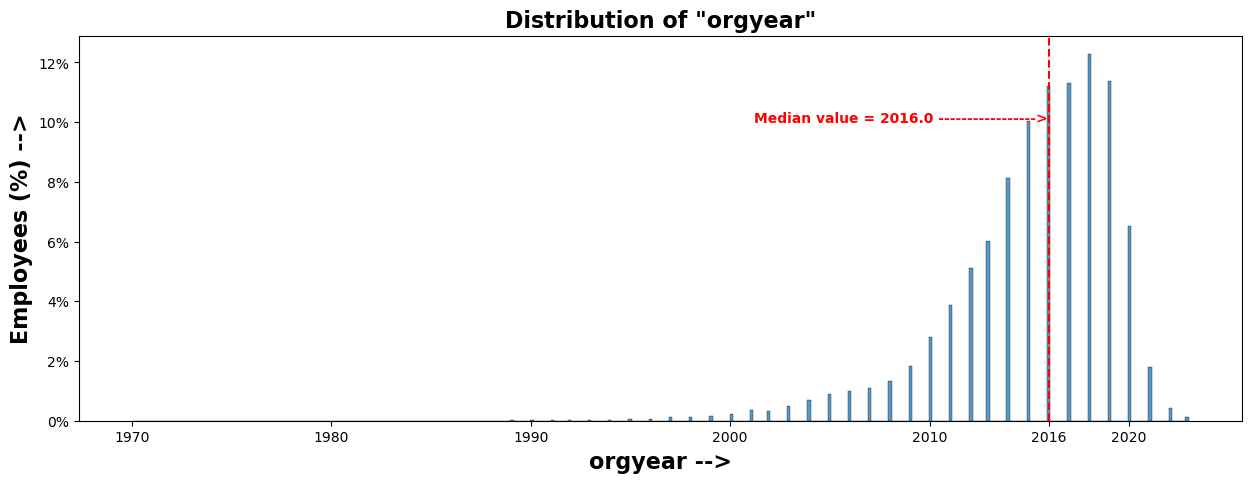

In [20]:
plt.figure(figsize = (15, 5))
sns.histplot(df['orgyear'], stat = 'percent')
plt.axvline(np.median(df['orgyear']), color = 'r', linestyle = '--')
plt.xticks(list(range(1970, 2030, 10)) + [df['orgyear'].median()])
plt.yticks(ticks = range(0, 14, 2), labels = [str(i) + '%' for i in range(0, 14, 2)])
plt.ylabel('Employees (%) -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('orgyear -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.text(x = 2001.2, y = 10, s = f'Median value = {df["orgyear"].median()} ----------------->', color = 'r', weight = 'bold')
plt.title('Distribution of "orgyear"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

### **`4. ctc:`** As we can see that feature "ctc" is having few outliers on the lower side and few on the higher side, therefore we will drop these outliers

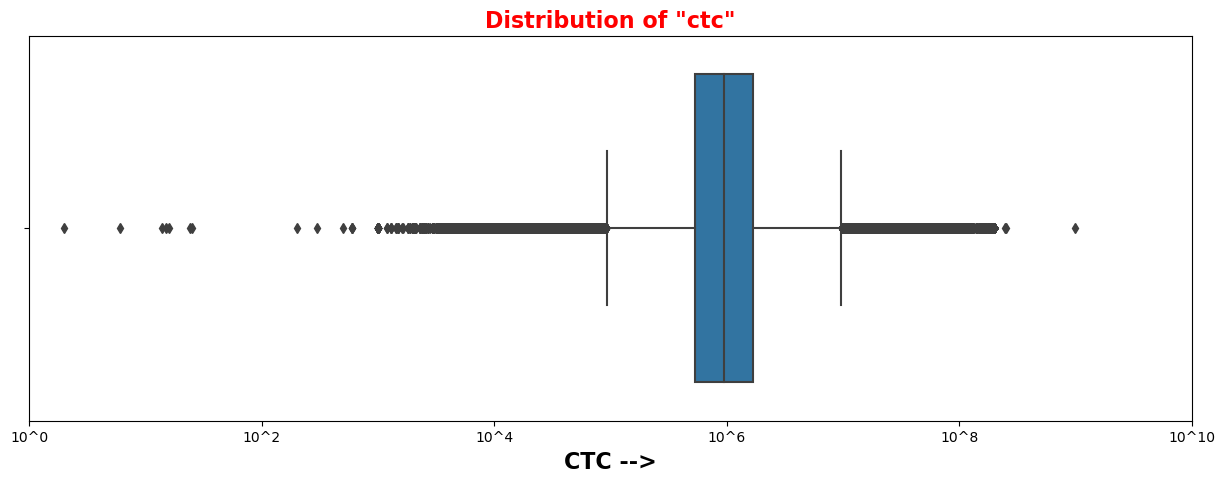

In [21]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = np.log10(df['ctc']))
plt.xlim(0, 10)
plt.xticks(ticks = range(0, 12, 2), labels = [f"10^{i}" for i in range(0, 12, 2)])
plt.xlabel('CTC -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.title('Distribution of "ctc"', fontdict = {'color':'red','size': 16, 'weight': 'bold'})
plt.show()

In [22]:
p1_ctc, p99_ctc = np.percentile(df['ctc'], [1, 99])
df = df[df['ctc'].between(p1_ctc, p99_ctc)]

### **`5. job_position:`** There are 992 unique values in **`"job_position"`** feature. Distribution of top 10 most frequent ones are plotted below. Almost 25% of the values are missing in **`"job_position"`** feature.

In [23]:
df['job_position'].nunique()

992

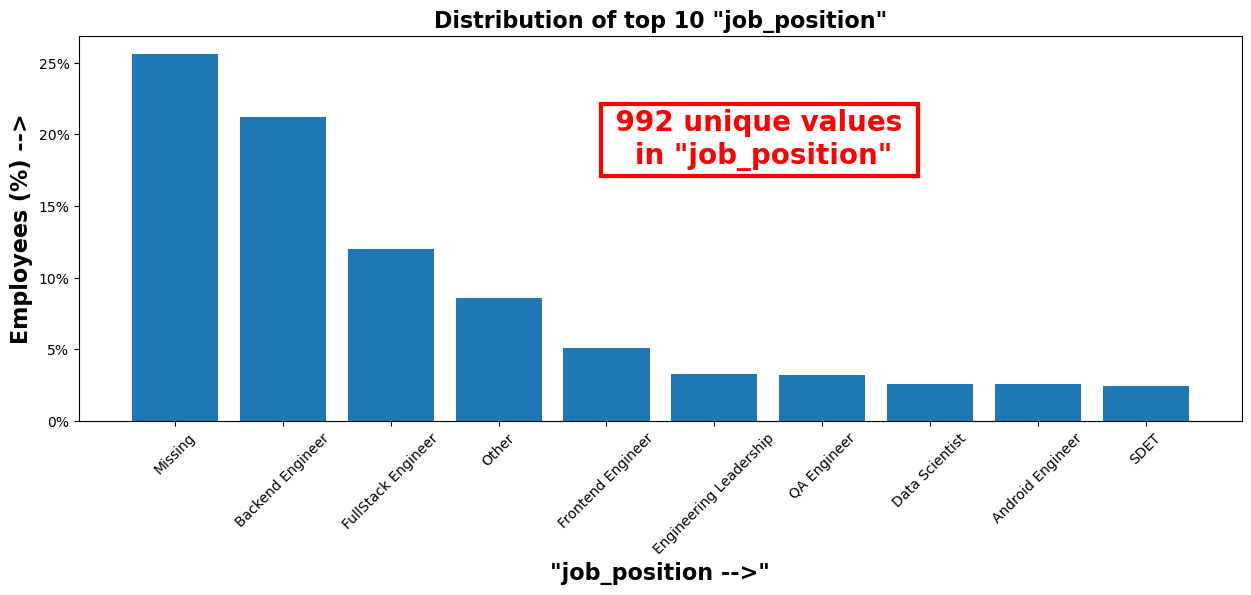

In [24]:
plt.figure(figsize = (15, 5))
plt.bar(x = df['job_position'].value_counts(normalize = True).index[:10],
        height = (df['job_position'].value_counts(normalize = True).round(3) * 100)[:10])
plt.xticks(rotation = 45, ticks = df['job_position'].value_counts(normalize = True).index[:10],
           labels = [val for val in df['job_position'].value_counts(normalize = True).index[:10]])
plt.yticks(ticks = np.arange(0, 30, 5), labels = [str(i) + '%' for i in np.arange(0, 30, 5)])
plt.text(x = 4, y = 18, s = f' {df["job_position"].nunique()} unique values \n   in "job_position"',
         fontdict = {'color':'red','size':20, 'weight': 'bold'},
         bbox=dict(facecolor='none', edgecolor='red', linewidth= 3))
plt.ylabel('Employees (%) -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('"job_position -->"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.title('Distribution of top 10 "job_position"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

### **`6. ctc_updated_year:`** There are 7 unique values in **`"ctc_updated_year"`** feature. ~89% of the employees have ctc updated in 2019 or later.

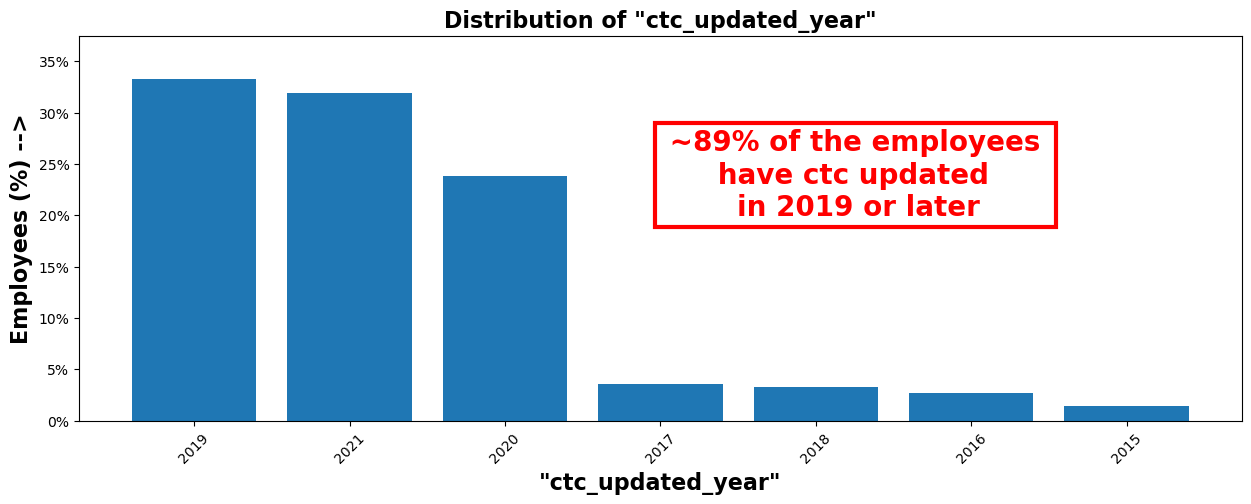

In [25]:
plt.figure(figsize = (15, 5))
plt.bar(x = df['ctc_updated_year'].astype('str').str.replace('.0', '', regex = False).value_counts(normalize = True).index,
        height = (df['ctc_updated_year'].astype('str').str.replace('.0', '', regex = False).value_counts(normalize = True).round(3) * 100))
plt.xticks(rotation = 45)
plt.yticks(ticks = np.arange(0, 40, 5), labels = [str(i) + '%' for i in np.arange(0, 40, 5)])
plt.ylim(0, 37.5)
plt.ylabel('Employees (%) -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('"ctc_updated_year"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.text(x = 3, y = 20, s = f" ~{int(round(df['ctc_updated_year'].value_counts(normalize = True).iloc[:3].sum(), 2) * 100)}% of the employees \n"
         + ' ' * 6 + f"have ctc updated \n" + ' ' * 8 + "in 2019 or later",
         fontdict = {'color':'red','size':20, 'weight': 'bold'},
         bbox=dict(facecolor='none', edgecolor='red', linewidth= 3))
plt.title('Distribution of "ctc_updated_year"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

### **`7. experience_in_years:`** There are 46 unique values in **`"experience_in_years"`** feature with a minimum value of -6 (which is clearly not possible) and a maximum value of 51. We'll drop those datapoints where the value in **`experience_in_years"`** is negative.

In [26]:
print(f"{df['experience_in_years'].nunique()} values in 'experience_in_years'")
print(f"Outliers --> {sorted(df.loc[df['experience_in_years'] < 0, 'experience_in_years'].unique())}")
print(f"Minimum value --> {df['experience_in_years'].min()}")
print(f"Maximum value --> {df['experience_in_years'].max()}")

52 values in 'experience_in_years'
Outliers --> [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0]
Minimum value --> -6.0
Maximum value --> 51.0


In [27]:
df = df[df["experience_in_years"] >= 0]

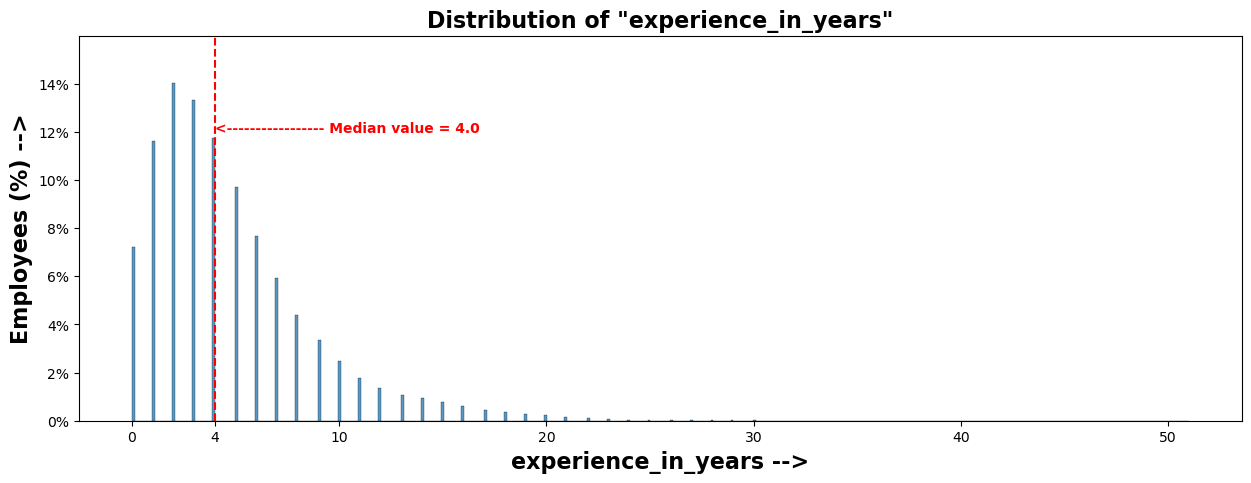

In [28]:
plt.figure(figsize = (15, 5))
sns.histplot(df['experience_in_years'], stat = 'percent')
plt.axvline(np.median(df['experience_in_years']), color = 'r', linestyle = '--')
plt.xticks(list(range(0, 60, 10)) + [df['experience_in_years'].median()])
plt.yticks(ticks = list(range(0, 16, 2)), labels = [str(i) + '%' for i in range(0, 16, 2)])
plt.ylim(0, 16)
plt.ylabel('Employees (%) -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('experience_in_years -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.text(x = df['experience_in_years'].median(), y = 12, s = f'<----------------- Median value = {df["experience_in_years"].median()}', color = 'r', weight = 'bold')
plt.title('Distribution of "experience_in_years"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

## **`Bivariate Analysis:`**

### **`experience_in_years vs ctc:`** There are 37274 unique values in **`"company_hash"`** feature. Distribution of top 10 most frequent ones are plotted below.

In [29]:
print(f"Minimum value = {int(df['experience_in_years'].min())} years of experience")
print(f"Maximum value = {int(df['experience_in_years'].max())} years of experience")

Minimum value = 0 years of experience
Maximum value = 51 years of experience


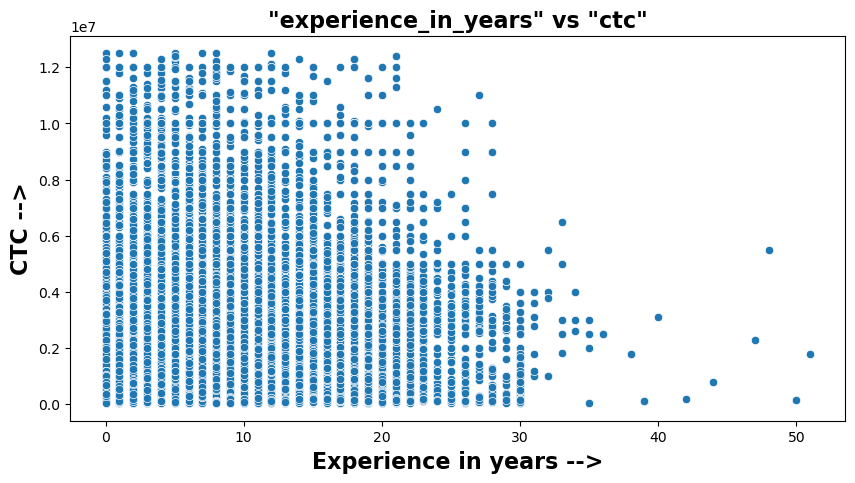

In [30]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'experience_in_years', y = 'ctc')
plt.ylabel('CTC -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('Experience in years -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.title('"experience_in_years" vs "ctc"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

### **`As we can see that there is no solid relationship between experience and ctc. Now let's plot experience vs median ctc`**

In [31]:
experience_vs_median_ctc = (df.groupby('experience_in_years')['ctc'].median().reset_index().astype({'experience_in_years': 'int64'})
                            .rename(columns = {'ctc': 'median_ctc'}))
experience_vs_median_ctc.head()

,experience_in_years,median_ctc
0,0,700000.0
1,1,680000.0
2,2,700000.0
3,3,800000.0
4,4,850000.0


### **`As we can see that upto 22 years of experience, the median ctc increases but after that, with more and more experience, there are people earning very high and there are also people who are not.`**

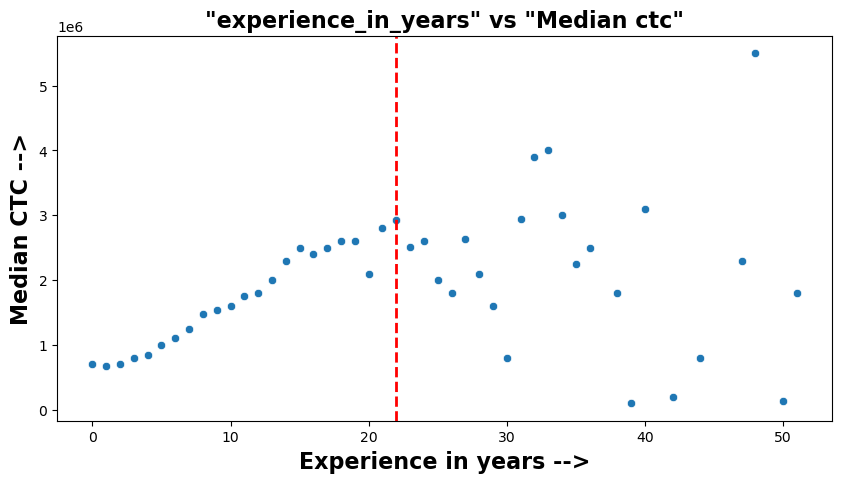

In [32]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = experience_vs_median_ctc, x = 'experience_in_years', y = 'median_ctc')
plt.ylabel('Median CTC -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('Experience in years -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.title('"experience_in_years" vs "Median ctc"', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.axvline(x = 22, linestyle = '--', color = 'r', linewidth = 2)
plt.show()

## **`Checking for unique emails:`** There are 143412 unique emails in the data out of 193056 total rows.

In [33]:
f"{df['email_hash'].nunique()} unique emails out of {df.shape[0]} datapoints"

'143412 unique emails out of 193056 datapoints'

In [34]:
df.loc[df.duplicated(subset = ['email_hash'], keep = False), 'email_hash'].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
                                                                    ..
641cfc0e8381a47252566670fa80240f3efe47b77045c2568bf06986df982bff     2
38b1f62527451e10a6885ff6d8ea2cebe1dd58d41c963f37cf47e5222375c243     2
2943614559a7e16c9f71a5673d5deaef97a0788c6c3b038c234fae9bbf7e1404     2
3531b6b6922dd818ffaf7fca6a633e953f983c7e485255ffc9e3225ff2e14676     2
8400c092bfe0b5baca38888c8cf2b9fda5e206c9812a22a05f3af039e372958b     2
Name: email_hash, Length: 39092, dtype: int64

#### There are some datapoints where for a **`"single email_hash"`** every feature except **`"job_position"`** has duplicate values. Let's impute the "Missing" job_position with the other values of the same group and then drop such datapoints.

In [35]:
dup_job_position = (df.groupby(['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year', 'experience_in_years'])
                    .filter(lambda grp: grp['job_position'].nunique() > 1)
                    .sort_values(['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year', 'experience_in_years']))

In [36]:
dup_job_position.head(6)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years
2936,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Missing,2020.0,0.0
16804,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0
97184,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Missing,2021.0,2.0
139758,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0
83358,10,8b50f3193be2ee05ae3d583477ee089a7e856f6658d56b...,1993.0,450000,Backend Engineer,2021.0,28.0
86236,10,8b50f3193be2ee05ae3d583477ee089a7e856f6658d56b...,1993.0,450000,Missing,2021.0,28.0


In [37]:
def get_job_position(df):
    if df.shape[0] == 1 or (df['job_position'] == 'Missing').all() or (df['job_position'] == 'Other').all():
        return df
    elif df['job_position'].isin(['Missing', 'Other']).all():
        return df[df['job_position'] == 'Other']
    else:
        return df[~df['job_position'].isin(['Missing', 'Other'])]

In [39]:
new_df = df.groupby(['company_hash', 'email_hash', 'orgyear', 'ctc', 'ctc_updated_year', 'experience_in_years']).apply(get_job_position)

## **`Removing special characters using regex`**

In [40]:
def my_clean(col):
    import regex as re
    return re.sub('[^A-Za-z0-9 ]+', '', col)

In [41]:
new_df['company_hash'] = new_df['company_hash'].str.replace(' ', '', regex = False).apply(my_clean)
new_df['email_hash'] = new_df['email_hash'].str.replace(' ', '', regex = False).apply(my_clean)

In [42]:
new_df.reset_index(drop = True, inplace = True)

## **`Duplicate Value Check`**

In [43]:
new_df[new_df.duplicated(keep = False)].sort_values(list(new_df.columns))

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years
9799,btqwtatomtzkqtotvqwyvzaatctrgubtznxzaxv,de8e353cd20cfd5ced34ba524fc065c0b076d047ff1273...,2013.0,1170000,Android Engineer,2019.0,6.0
9852,btqwtatomtzkqtotvqwyvzaatctrgubtznxzaxv,de8e353cd20cfd5ced34ba524fc065c0b076d047ff1273...,2013.0,1170000,Android Engineer,2019.0,6.0
93769,tatzobvqnygbtorru,0b38271bf5aad59b9335965711734f07f1a83a5dc0bcb5...,2018.0,920000,Android Engineer,2020.0,2.0
93770,tatzobvqnygbtorru,0b38271bf5aad59b9335965711734f07f1a83a5dc0bcb5...,2018.0,920000,Android Engineer,2020.0,2.0


In [44]:
new_df.drop_duplicates(subset = list(new_df.columns), inplace = True)

## **`Manual Clustering`**

### **`1. On the basis of learner’s company, job position and years of experience - Designation`**

In [45]:
def get_designation(data):
    if data['ctc'] > data['mean_designation_ctc']:
        return 1
    elif data['ctc'] == data['mean_designation_ctc']:
        return 2
    else:
        return 3

In [46]:
company_pos_exp_cluster = new_df.groupby(['company_hash', 'job_position', 'experience_in_years'])\
                                .agg({'ctc': ['mean', 'median', 'min', 'max', 'count']}).reset_index()
company_pos_exp_cluster.columns = ['company_hash', 'job_position', 'experience_in_years',
                                   'mean_designation_ctc', 'median_ctc', 'min_ctc', 'max_ctc', 'emp_count']
company_pos_exp_cluster.head()

,company_hash,job_position,experience_in_years,mean_designation_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,Other,0.0,100000.0,100000.0,100000,100000,1
1,0000,Other,3.0,300000.0,300000.0,300000,300000,1
2,01ojztqsj,Android Engineer,3.0,270000.0,270000.0,270000,270000,1
3,01ojztqsj,Frontend Engineer,8.0,830000.0,830000.0,830000,830000,1
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,2.0,1100000.0,1100000.0,1100000,1100000,1


In [47]:
new_df = new_df.merge(company_pos_exp_cluster,
                      how = 'left',
                      left_on = ['company_hash', 'job_position', 'experience_in_years'],
                      right_on = ['company_hash', 'job_position', 'experience_in_years'])

In [48]:
new_df['designation'] = new_df[['ctc', 'mean_designation_ctc']].apply(get_designation, axis = 1)
new_df.drop(columns = ['median_ctc', 'min_ctc', 'max_ctc', 'emp_count'], inplace = True)

### **`2. On the basis of learner’s company, job position - Class`**

In [49]:
def get_class(data):
    if data['ctc'] > data['mean_class_ctc']:
        return 1
    elif data['ctc'] == data['mean_class_ctc']:
        return 2
    else:
        return 3

In [50]:
company_pos_cluster = new_df.groupby(['company_hash', 'job_position']).agg({'ctc': ['mean', 'median', 'min', 'max', 'count']}).reset_index()
company_pos_cluster.columns = ['company_hash', 'job_position', 'mean_class_ctc', 'median_ctc', 'min_ctc', 'max_ctc', 'emp_count']
company_pos_cluster.head()

,company_hash,job_position,mean_class_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,Other,100000.0,100000.0,100000,100000,1
1,0000,Other,300000.0,300000.0,300000,300000,1
2,01ojztqsj,Android Engineer,270000.0,270000.0,270000,270000,1
3,01ojztqsj,Frontend Engineer,830000.0,830000.0,830000,830000,1
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,1100000.0,1100000.0,1100000,1100000,1


In [51]:
new_df = new_df.merge(company_pos_cluster,
                  how = 'left',
                  left_on = ['company_hash', 'job_position'],
                  right_on = ['company_hash', 'job_position'])

In [52]:
new_df['class'] = new_df[['ctc', 'mean_class_ctc']].apply(get_class, axis = 1)
new_df.drop(columns = ['median_ctc', 'min_ctc', 'max_ctc', 'emp_count'], inplace = True)

### **`3. On the basis of learner’s company - Tier`**

In [53]:
def get_tier(data):
    if data['ctc'] > data['mean_tier_ctc']:
        return 1
    elif data['ctc'] == data['mean_tier_ctc']:
        return 2
    else:
        return 3

In [54]:
company_cluster = new_df.groupby(['company_hash']).agg({'ctc': ['mean', 'median', 'min', 'max', 'count']}).reset_index()
company_cluster.columns = ['company_hash', 'mean_tier_ctc', 'median_ctc', 'min_ctc', 'max_ctc', 'emp_count']
company_cluster.head()

,company_hash,mean_tier_ctc,median_ctc,min_ctc,max_ctc,emp_count
0,0,100000.0,100000.0,100000,100000,1
1,0000,300000.0,300000.0,300000,300000,1
2,01ojztqsj,550000.0,550000.0,270000,830000,2
3,05mzexzytvrnyuqxcvntrxbxnta,1100000.0,1100000.0,1100000,1100000,1
4,1,100000.0,100000.0,100000,100000,1


In [55]:
new_df = new_df.merge(company_cluster,
                  how = 'left',
                  left_on = ['company_hash'],
                  right_on = ['company_hash'])

In [56]:
new_df['tier'] = new_df[['ctc', 'mean_tier_ctc']].apply(get_tier, axis = 1)
new_df.drop(columns = ['median_ctc', 'min_ctc', 'max_ctc', 'emp_count'], inplace = True)

In [57]:
new_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
0,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0,100000.0,2,100000.0,2,100000.0,2
1,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,Other,2020.0,3.0,300000.0,2,300000.0,2,300000.0,2
2,01ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,Android Engineer,2019.0,3.0,270000.0,2,270000.0,2,550000.0,3
3,01ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,Frontend Engineer,2019.0,8.0,830000.0,2,830000.0,2,550000.0,1
4,05mzexzytvrnyuqxcvntrxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0,1100000.0,2,1100000.0,2,1100000.0,2


## **`Top 10 employees (earning more than most of the employees in the company) - Tier 1`**
- ## **`Here we'll find out the tier 1 learners who have the top 10 highest salaries`**
    - ### **`1. Among the top 10 tier 1 learners, 3 are Frontend Engineer, 2 are FullStack Engineer, 1 Backend Engineer, 1 Engineering Leadership 1 Other and 2 missing values. The salaries are ranging from 12.4 - 12.5 Mn`**
    - ### **`2. Work Experience is ranging from 0 to 21 years.`**

In [58]:
tier_1 = new_df.loc[new_df['tier'] == 1]
top_tier_1 = tier_1.sort_values('ctc', ascending = False)[:10]
top_tier_1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
127412,wmqt,1fbc495e7adfb0282b8ff8a436456938ba85f96f811971...,2018.0,12500000,Frontend Engineer,2020.0,2.0,1.250000e+07,2,6.685000e+06,1,3.508889e+06,1
156796,zgnvuurxwvmrtvwwghzn,b69935e9b3fb05bfca232556188524cf7e0106eebbc2c2...,2019.0,12500000,Frontend Engineer,2021.0,2.0,1.307000e+06,1,7.130000e+05,1,9.093656e+05,1
14208,bxwqgogen,6c06af2e23026b01862d74dc9980f3094673e5b33c909b...,2014.0,12500000,FullStack Engineer,2019.0,5.0,3.130035e+06,1,2.861900e+06,1,2.831099e+06,1
162555,zvz,ab48cea6068c8b0b7fbf6d152c82cc041a3f76285bf7a9...,2019.0,12500000,Missing,2019.0,0.0,1.377728e+06,1,1.251479e+06,1,1.166109e+06,1
117822,vvvvv,9b543e7020439a87f759ac633f4c6f2bec139bb217934f...,2008.0,12500000,Missing,2020.0,12.0,1.250000e+07,2,1.250000e+07,2,6.325000e+06,1
146920,xzntrwgqugqvnxgz,d58b91dd7a17c848974092b5d8a44f23d8d1f9de67c0cd...,2018.0,12500000,Frontend Engineer,2019.0,1.0,7.600000e+06,1,3.038750e+06,1,1.853070e+06,1
103807,uvjuvr,5a2eb60ae8a4f79530481963227cfd956246b93425dfa3...,2015.0,12500000,Backend Engineer,2017.0,2.0,2.383518e+06,1,2.263371e+06,1,2.315601e+06,1
111194,vbvkgz,ee72941e60f3c8b6144bd387fdbfa8c86d0d8f38367b85...,2011.0,12500000,Other,2018.0,7.0,1.811333e+06,1,9.990613e+05,1,2.347584e+06,1
115690,vrnxbtnqxp,02ec75722194e07fcd31a7929843fc3c5fb3dd3a1e1d8b...,2012.0,12500000,FullStack Engineer,2020.0,8.0,5.886667e+06,1,1.974583e+06,1,1.654735e+06,1
134189,wxowg,93dcd165bf349cec6621dc3f1f1624f30747cf158ec4dc...,1999.0,12400000,Engineering Leadership,2020.0,21.0,5.063000e+06,1,3.840608e+06,1,1.925009e+06,1


## **`Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1`**
- ## **`As the company names are hashed (therfore we can't filter for Amazon/TCS), so we'll find out the Class 1 learners who have the top 10 highest salaries in Data Science`**
    - ### **`1. Among the Data Science top 10 Class 1 learners, 9 are Data Scientists and 1 is Data Analyst. The salaries are ranging from 10 - 12 Mn`**
    - ### **`2. Work Experience is ranging from 1 to 19 years.`**

In [59]:
data_science_class_1 = new_df[(new_df['job_position'].str.contains('data', regex = False, case = False))
                              & ((new_df['job_position'].str.contains('science', regex = False, case = False))
                                 | (new_df['job_position'].str.contains('scientist', regex = False, case = False))
                                 | (new_df['job_position'].str.contains('analyst', regex = False, case = False))) & (new_df['class'] == 1)]
top_10_data_science_class_1 = data_science_class_1.sort_values('ctc', ascending = False)[:10]
top_10_data_science_class_1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
46850,mgtxzs,6b6466eb7dec3b55b8758b7850b9ca2ff562c4f7e654fa...,2019.0,12000000,Data Scientist,2020.0,1.0,1.200000e+07,2,5.003333e+06,1,1.412528e+06,1
88689,sgltp,24d6a653ce21e80d3f03eaab9b7600f4bbb0888cf7bccd...,2005.0,12000000,Data Scientist,2018.0,13.0,1.200000e+07,2,5.666667e+06,1,3.228967e+06,1
27922,fvrbvqnrvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,Data Scientist,2020.0,2.0,4.636000e+06,1,4.337917e+06,1,2.804691e+06,1
25985,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,Data Scientist,2020.0,7.0,1.200000e+07,2,4.262500e+06,1,1.709321e+06,1
67246,ohnytqrvza,3ebd4d0ab52ccfb9def2520cb5a47a74f716fe9776ffd6...,2000.0,11600000,Data Scientist,2019.0,19.0,1.160000e+07,2,6.155000e+06,1,2.237609e+06,1
88543,sggsrt,b17a6bbd97fdca270fba3775ccca535a7c29ce67952914...,2014.0,11000000,Data Scientist,2020.0,6.0,1.100000e+07,2,3.750000e+06,1,2.786261e+06,1
109288,vbvkgz,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,2014.0,10900000,Data Scientist,2019.0,5.0,4.077500e+06,1,2.876296e+06,1,2.347584e+06,1
110096,vbvkgz,8b790d48bafc3d1457a3863a11714e3fed88131c83134d...,2007.0,10100000,Data Scientist,2021.0,14.0,1.010000e+07,2,2.876296e+06,1,2.347584e+06,1
3600,atrr,5786e82bd211093df08e360d9af9ea6adea8fe6885477b...,2017.0,10000000,Data Scientist,2020.0,3.0,3.933333e+06,1,2.800000e+06,1,1.493482e+06,1
30310,fxuqgrxbxnta,c19d6c77a80b3e5163c6f6555f116351768de98aa976a7...,2016.0,10000000,Data Scientist,2020.0,4.0,3.301750e+06,1,1.015943e+06,1,6.899394e+05,1


## **`Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3`**
- ## **`As the company names are hashed (therfore we can't filter for Amazon/TCS), so we'll find out the Class 3 learners who have the bottom 10 lowest salaries in Data Science`**
    - ### **`1. Among the Data Science top 10 Class 3 learners, 7 are Data Scientists and 3 are Data Analyst. The salaries are ranging from 39000 - 70000`**
    - ### **`2. Work Experience is ranging from 0 to 13 years.`**

In [60]:
data_science_class_3 = new_df[(new_df['job_position'].str.contains('data', regex = False, case = False))
                              & ((new_df['job_position'].str.contains('science', regex = False, case = False))
                                 | (new_df['job_position'].str.contains('scientist', regex = False, case = False))
                                | (new_df['job_position'].str.contains('analyst', regex = False, case = False))) & (new_df['class'] == 3)]
bottom_10_data_science_class_3 = data_science_class_3.sort_values('ctc', ascending = True)[:10]
bottom_10_data_science_class_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
12784,bwpxzotj,8df69a6bd94ff70642cd9a9b39e460fac13af0918a732e...,2020.0,39000,Data Scientist,2021.0,1.0,39000.0,2,7.563333e+05,3,1.227375e+06,3
20506,dtqgd,ece6f9a4632851c64571a572cf36f67f980f8d7ac9f553...,2015.0,45000,Data Scientist,2019.0,4.0,45000.0,2,1.515000e+06,3,1.341250e+06,3
96643,tqxwoogz,d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...,2017.0,49000,Data Scientist,2017.0,0.0,49000.0,2,1.587370e+06,3,1.235197e+06,3
90380,sqvahvntonhatzn,b2ae944664b44bf22fba195d3dc6c255cdd6d20322590c...,2021.0,50000,Data Scientist,2021.0,0.0,50000.0,2,1.025000e+06,3,7.534516e+05,3
66682,ogwxnszqvrt,38e8416bc59782b9fb60b144657130662ec8dab8094a41...,2018.0,55000,Data Scientist,2021.0,3.0,1127500.0,3,1.935000e+06,3,1.715130e+06,3
40070,ihvrwgbb,86d6338b5d63e4e79c34275181ed4fa1c548ea9070df75...,2020.0,60000,Data Analyst,2021.0,1.0,480000.0,3,4.800000e+05,3,2.052040e+06,3
146779,xzntrwgqugqvnxgz,6344f65bdb7dc5da9abb8bdb0f90b92718ac2f85556746...,2015.0,60000,Data Scientist,2017.0,2.0,897000.0,3,1.300667e+06,3,1.853070e+06,3
112214,vgz,a5c941c920a6bf48686264aacfae3da80fa77e5ad316d9...,2006.0,60500,Data Analyst,2019.0,13.0,60500.0,2,5.261000e+05,3,7.461071e+05,3
153835,zcxaxv,4e2f9e739539b86fe800c8d725ff6bb0992554a680a8ed...,2011.0,70000,Data Scientist,2020.0,9.0,70000.0,2,1.850000e+05,3,2.050330e+06,3
144186,xzegojo,c0185d6629e00c749c015bbf7e5b5cf666e8f4299246dc...,2006.0,70000,Data Analyst,2017.0,11.0,790000.0,3,7.847894e+05,3,6.477700e+05,3


## **`Bottom 10 employees (earning less than most of the employees in the company)- Tier 3`**
- ## **`Here we'll find out the Tier 3 learners who have the bottom 10 lowest salaries`**
    - ### **`1. Among the bottom 10 tier 3 learners, 3 are Backend Engineer, 1 is FullStack Engineer, 1 is Frontend Engineer, 2 Other and 2 missing values. The salaries are ranging from 37000 - 39000`**
    - ### **`2. Work Experience is ranging from 0 to 7 years.`**

In [61]:
tier_3 = new_df[(new_df['tier'] == 3)]
bottom_10_tier_3 = tier_3.sort_values('ctc', ascending = True)[:10]
bottom_10_tier_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
74832,ovowvqntwzgrgsxvtotshqvzvvhngbgnxcvov,6063bf1f68dff47765ec022e1bab3d9556e3269ad6dbc4...,2016.0,37000,Missing,2017.0,1.0,3.700000e+04,2,3.700000e+04,2,3.185000e+05,3
154621,zgnvuurxwvmrt,2987cc9b36fab6ab1a7961b2734368593ddb1392c99fda...,2017.0,37000,Missing,2017.0,0.0,1.254069e+06,3,1.032718e+06,3,1.027237e+06,3
85308,rggpxzsegqvlgm,825eb55baad43603ee8876ce69b068ed70c156772c329d...,2017.0,37000,Other,2019.0,2.0,6.850000e+04,3,7.531429e+05,3,7.801818e+05,3
26964,ftontqzaxsxnvr,0e4f08076ce58deca2ffc36ff9b1fd267ad16d86230306...,2016.0,37000,Missing,2020.0,4.0,8.585000e+05,3,1.729700e+06,3,2.188339e+06,3
162714,zvz,cdb728ab5e96cd9370daab79e08c6ac9d9ecf235ab5e51...,2021.0,37000,FullStack Engineer,2021.0,0.0,1.127841e+06,3,1.080753e+06,3,1.166109e+06,3
153830,zcxaxv,40693665830944b1b7565f21a885e438170124d05b9af9...,2012.0,37000,Backend Engineer,2017.0,5.0,3.700000e+04,2,2.376048e+06,3,2.050330e+06,3
38528,hzxntaonvntovxqegqwt,d1ac2cfd48fadc3fc08b7dcccba54305bc2bcf38ac2332...,2015.0,38000,Other,2017.0,2.0,3.800000e+04,2,3.800000e+04,2,4.150000e+04,3
155255,zgnvuurxwvmrtvwwghzn,06a151ad33d97ac9110ed187235bdc898ba639c42e234f...,2015.0,38000,Frontend Engineer,2021.0,6.0,7.431111e+05,3,7.130000e+05,3,9.093656e+05,3
86702,rvkvavsqghu,d2a62accb5d8e790d416025d409cbedd27da23a9359a53...,2013.0,39000,Backend Engineer,2020.0,7.0,3.900000e+04,2,2.222250e+06,3,2.040400e+06,3
12784,bwpxzotj,8df69a6bd94ff70642cd9a9b39e460fac13af0918a732e...,2020.0,39000,Data Scientist,2021.0,1.0,3.900000e+04,2,7.563333e+05,3,1.227375e+06,3


## **`Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X`**
- ## **`As the company names are hashed (therfore we can't filter for Amazon), so we'll find out the tier 1 learners with 5/6/7 years of experience in Data Science department who have the top 10 highest salaries`**
    - ### **`Among the top 10 tier 1 learners wikth 5-7 years of experience in Data Science, 8 are Data Scientist, 2 are Data Analyst. The salaries are ranging from 7.9 - 12 Mn`**

In [62]:
data_science_tier_1_with_exp = new_df[(new_df['job_position'].str.contains('data', regex = False, case = False))
                                      & ((new_df['job_position'].str.contains('science', regex = False, case = False))
                                         | (new_df['job_position'].str.contains('scientist', regex = False, case = False))
                                         | (new_df['job_position'].str.contains('analyst', regex = False, case = False)))
                                      & (new_df['tier'] == 1) & (new_df['experience_in_years'].between(5, 7))]
top_10_data_science_tier_1_with_exp = data_science_tier_1_with_exp.sort_values('ctc', ascending = False)[:10]
top_10_data_science_tier_1_with_exp

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
25985,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,Data Scientist,2020.0,7.0,12000000.0,2,4.262500e+06,1,1.709321e+06,1
88543,sggsrt,b17a6bbd97fdca270fba3775ccca535a7c29ce67952914...,2014.0,11000000,Data Scientist,2020.0,6.0,11000000.0,2,3.750000e+06,1,2.786261e+06,1
109288,vbvkgz,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,2014.0,10900000,Data Scientist,2019.0,5.0,4077500.0,1,2.876296e+06,1,2.347584e+06,1
64471,nytsqtvnwghqoto,764b7f8e922c062a95b362f454e53d7d9fdd23efdfe49f...,2015.0,10000000,Data Scientist,2021.0,6.0,10000000.0,2,1.000000e+07,2,1.920000e+06,1
86885,rvqotznghmqg,c1b14f05f5d5534b1f5ddfde5c32910455e3c98669b7be...,2015.0,10000000,Data Scientist,2020.0,5.0,10000000.0,2,3.285000e+06,1,9.326111e+05,1
69125,onqxut,affcfd4e17c9a8b24b91cde2aa1c2b47b1978212b0b75b...,2013.0,9000000,Data Scientist,2019.0,6.0,9000000.0,2,9.000000e+06,2,5.750000e+06,1
142313,xzegojo,469f1cc410c4a277d36b66d861e20318b73f3f8164c1d3...,2009.0,9000000,Data Analyst,2016.0,7.0,2383600.0,1,7.847894e+05,1,6.477700e+05,1
92532,stzuvwn,2ef1d3d34d78fcc08772ce6fcc8d22ba23b78c1654ef61...,2014.0,8200000,Data Analyst,2020.0,6.0,4250000.0,1,1.202667e+06,1,9.934182e+05,1
120996,vxqmzm,67aa9d931d4f20a481bb08ca1e62f572806a0072ee359a...,2014.0,8000000,Data Scientist,2021.0,7.0,8000000.0,2,8.000000e+06,2,2.012857e+06,1
28168,fvrbvqnrvmo,abd1d01ed479f408a6d6b5717cdc8847c9a67c21ae0fe8...,2014.0,7900000,Data Scientist,2019.0,5.0,4866000.0,1,4.337917e+06,1,2.804691e+06,1


## **`Top 10 companies (based on their CTC)`**
- ## **`Here we are finding the top 10 companies with highest maximum salary`**
- ## **`Maximum salaries range from 12.4 - 12.5 Mn`**

In [63]:
company_wise_max_ctc = new_df.groupby('company_hash')['ctc'].max().reset_index()
company_wise_max_ctc.columns = ['company_hash', 'max_ctc']
company_wise_max_ctc.sort_values('max_ctc', ascending = False)[:10]

,company_hash,max_ctc
33420,zgnvuurxwvmrtvwwghzn,12500000
24553,vbvkgz,12500000
3502,bxwqgogen,12500000
23699,uvjuvr,12500000
34348,zvz,12500000
28441,wmqt,12500000
26789,vvvvv,12500000
31823,xzntrwgqugqvnxgz,12500000
25939,vrnxbtnqxp,12500000
29413,wvqttb,12400000


## **`Top 2 positions in every company (based on their CTC)`**
- ## **`Here we are finding the top 2 positions in each company with highest maximum salary`**
- ## **`The maximum salary offered out of all is 12.5 Mn which is offered by 7 companies to FullStack Engineers, Frontend Engineers & Backend Engineers`**

In [64]:
def get_top_2_position(df):
    df = df.sort_values(['ctc'], ascending = False)
    if df.shape[0] <= 2:
        return df
    elif (~df['job_position'].isin(['Missing', 'Other'])).sum() >= 2:
        df = df[(~df['job_position'].isin(['Missing', 'Other']))]
        return df.iloc[:2, :]
    else:
        return df.iloc[:2, :]

In [68]:
company_wise_position_wise_max_ctc = new_df.groupby(['company_hash', 'job_position'])['ctc'].max().reset_index()
company_wise_top_2_positions = company_wise_position_wise_max_ctc.groupby('company_hash').apply(get_top_2_position).reset_index(drop = True)

In [69]:
company_wise_top_2_positions.head(5)

,company_hash,job_position,ctc
0,0,Other,100000
1,0000,Other,300000
2,01ojztqsj,Frontend Engineer,830000
3,01ojztqsj,Android Engineer,270000
4,05mzexzytvrnyuqxcvntrxbxnta,Backend Engineer,1100000


In [70]:
company_wise_top_2_positions[company_wise_top_2_positions['ctc'] == company_wise_top_2_positions['ctc'].max()]

,company_hash,job_position,ctc
4347,bxwqgogen,FullStack Engineer,12500000
29483,uvjuvr,Backend Engineer,12500000
32254,vrnxbtnqxp,FullStack Engineer,12500000
33310,vvvvv,Missing,12500000
35387,wmqt,Frontend Engineer,12500000
39629,xzntrwgqugqvnxgz,Frontend Engineer,12500000
41660,zgnvuurxwvmrtvwwghzn,Frontend Engineer,12500000


## **`Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data`**

### **`Dropping irrelevant features:`**
- ### **`1. As we've already made feature "experience_in_years" out of "orgyear" & "ctc_updated_year", so we don't need these 2 columns.`**
- ### **`2. Dropping features - "company_hash", "mean_designation_ctc", "mean_class_ctc", "mean_tier_ctc", "email_hash"`**

In [71]:
new_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,experience_in_years,mean_designation_ctc,designation,mean_class_ctc,class,mean_tier_ctc,tier
0,0,e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...,2020.0,100000,Other,2020.0,0.0,100000.0,2,100000.0,2,100000.0,2
1,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,2017.0,300000,Other,2020.0,3.0,300000.0,2,300000.0,2,300000.0,2
2,01ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,2016.0,270000,Android Engineer,2019.0,3.0,270000.0,2,270000.0,2,550000.0,3
3,01ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,2011.0,830000,Frontend Engineer,2019.0,8.0,830000.0,2,830000.0,2,550000.0,1
4,05mzexzytvrnyuqxcvntrxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,2019.0,1100000,Backend Engineer,2021.0,2.0,1100000.0,2,1100000.0,2,1100000.0,2


In [72]:
new_df2 = deepcopy(new_df)

In [73]:
new_df2.drop(columns = ['company_hash', 'orgyear', 'ctc_updated_year', 'mean_designation_ctc', 'mean_class_ctc', 'mean_tier_ctc', 'email_hash'], inplace = True)

In [74]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,100000,Other,0.0,2,2,2
1,300000,Other,3.0,2,2,2
2,270000,Android Engineer,3.0,2,2,3
3,830000,Frontend Engineer,8.0,2,2,1
4,1100000,Backend Engineer,2.0,2,2,2


### **`Label Encoding:`**
- ### **` As the feature like "job_position" is nominal categorical features with no natural order within them, we'll use Label Endoding on them. And because these features have very high cardinality, we'll use Standard Scaler after that`**

In [75]:
le_job_position = LabelEncoder()
scaler = StandardScaler()
new_df2['job_position'] = le_job_position.fit_transform(new_df2['job_position'])
new_df2['job_position'] = scaler.fit_transform(new_df2[['job_position']]).flatten()

In [76]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,100000,0.745660,0.0,2,2,2
1,300000,0.745660,3.0,2,2,2
2,270000,-1.518099,3.0,2,2,3
3,830000,-0.158720,8.0,2,2,1
4,1100000,-0.939520,2.0,2,2,2


### **`Standard Scaler:`**
- ### **` As the features like "ctc" & "experience_in_years" are ordinal numerical features with a natural order within them, we'll use Standard Scaler on them.`**

In [77]:
scaler_2 = StandardScaler()
new_df2[['ctc', 'experience_in_years']] = scaler_2.fit_transform(new_df2[['ctc', 'experience_in_years']])

In [78]:
new_df2.head()

,ctc,job_position,experience_in_years,designation,class,tier
0,-0.991735,0.745660,-1.180866,2,2,2
1,-0.832810,0.745660,-0.439393,2,2,2
2,-0.856649,-1.518099,-0.439393,2,2,3
3,-0.411657,-0.158720,0.796396,2,2,1
4,-0.197107,-0.939520,-0.686551,2,2,2


## **`Unsupervised Learning - Clustering`**

## **`K-means clustering`**

#### **`Trying several values of K (number of clusters) to train K-Means clustering model and storing models, their corresponding inertia and cluster centres in Python list`**

In [79]:
kmeans_models = []
n_clusters = list(range(2, 31))
inertias = []
cluster_centres = []
labels = []

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, init = 'random', n_init = 10, random_state = 1)
    kmeans.fit(new_df2)
    kmeans_models.append(kmeans)
    inertia = kmeans.inertia_
    cluster_centre = kmeans.cluster_centers_
    label = kmeans.labels_
    inertias.append(inertia)
    cluster_centres.append(cluster_centre)
    labels.append(label)

### **`Elbow Method --> To find out the optimum value of number of clusters`**

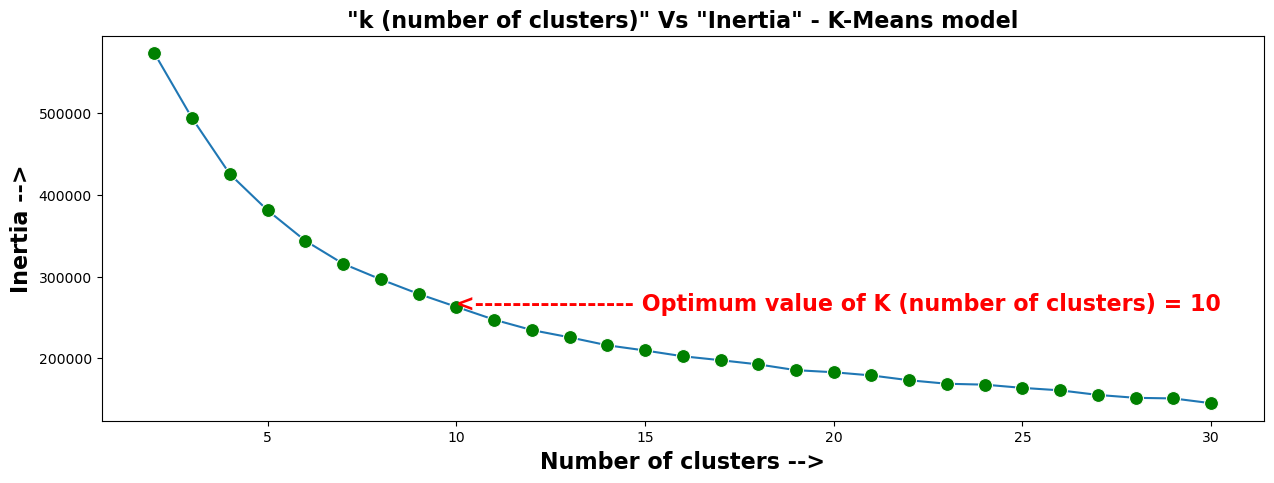

In [80]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = n_clusters, y = inertias, marker = 'o', markersize=10, markerfacecolor='green')
plt.ylabel('Inertia -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('Number of clusters -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.text(x = 10, y = 259000, s = f'<----------------- Optimum value of K (number of clusters) = 10', color = 'r', weight = 'bold', fontdict = {'size': 16})
plt.title('"k (number of clusters)" Vs "Inertia" - K-Means model', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

## **`Inertia at K = 10 (optimum number of clusters) --> 263017`**

In [81]:
best_kmeans = KMeans(n_clusters = 10, init = 'random', n_init = 10, random_state = 1)
best_kmeans.fit(new_df2)
best_kmeans.inertia_

263017.3995449921

#### **`Assigning clusters (output of K-Means clustering model) to the datapoints`**

In [82]:
kmeans_data = deepcopy(new_df2)
kmeans_data['label'] = best_kmeans.labels_

#### **`Scaling the data back to the original scale to understand the pattern in clusters output by K-Means model`**

In [83]:
kmeans_data[['ctc', 'experience_in_years']] = scaler_2.inverse_transform(kmeans_data[['ctc', 'experience_in_years']])
kmeans_data['job_position'] = scaler.inverse_transform(kmeans_data[['job_position']]).flatten()
kmeans_data['job_position'] = le_job_position.inverse_transform(kmeans_data['job_position'].astype('int64'))

## **`Let's check pattern in few of the clusters output by K-Means clustering algorithm`**

### **`Cluster 1:`**
- #### **`1. CTC: Median CTC = 700000`** 
- #### **`2. Job Position: Most Frequent Job Position is Support Engineer`** 
- #### **`3. Work Experience: Median work experience is 4 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 2:`**
- #### **`1. CTC: Median CTC = 700000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 3 years`**
- #### **`4. Designation: Most Frequent Designation is 3`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 3:`**
- #### **`1. CTC: Median CTC = 819999`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 4 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 2`** 

### **`Cluster 4:`**
- #### **`1. CTC: Median CTC = 2100000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 9 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 5:`**
- #### **`1. CTC: Median CTC = 2150000.0`** 
- #### **`2. Job Position: Most Frequent Job Position is Engineering Leadership`** 
- #### **`3. Work Experience: Median work experience is 15 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 6:`**
- #### **`1. CTC: Median CTC = 1700000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 3 years`**
- #### **`4. Designation: Most Frequent Designation is 1`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 7:`**
- #### **`1. CTC: Median CTC = 750000`** 
- #### **`2. Job Position: Most Frequent Job Position is Missing`** 
- #### **`3. Work Experience: Median work experience is 4 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 8:`**
- #### **`1. CTC: Median CTC = 5500000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 7 years`**
- #### **`4. Designation: Most Frequent Designation is 1`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 9:`**
- #### **`1. CTC: Median CTC = 800000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 3 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 10:`**
- #### **`1. CTC: Median CTC = 500000.0`** 
- #### **`2. Job Position: Most Frequent Job Position is Missing`** 
- #### **`3. Work Experience: Median work experience is 3 years`**
- #### **`4. Designation: Most Frequent Designation is 3`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

In [84]:
def mode(col):
    return col.value_counts().index[0]

In [109]:
kmeans_cluster_agg = kmeans_data.groupby('label').agg({'ctc': 'median', 'job_position': mode, 'experience_in_years': 'median', 
                                                       'designation': mode, 'class': mode, 'tier': mode})
kmeans_cluster_agg.columns = ['Median ctc', 'Most Frequent Job Position', 'Median Work Experience',
                              'Most Frequent Designation', 'Most Frequent Class', 'Most Frequent Tier']
kmeans_cluster_agg.index.name = 'Cluster'
kmeans_cluster_agg.index += 1
kmeans_cluster_agg

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,700000.0,Support Engineer,4.0,2,2,3
2,700000.0,Backend Engineer,3.0,3,3,3
3,819999.0,Backend Engineer,4.0,2,2,2
4,2100000.0,Backend Engineer,9.0,2,1,1
5,2150000.0,Engineering Leadership,15.0,2,2,1
6,1700000.0,Backend Engineer,3.0,1,1,1
7,750000.0,Missing,4.0,2,2,3
8,5500000.0,Backend Engineer,7.0,1,1,1
9,800000.0,Backend Engineer,3.0,2,3,3


In [111]:
kmeans_cluster_agg_std = deepcopy(kmeans_cluster_agg)
kmeans_cluster_agg_std[['Median ctc', 'Median Work Experience']] = scaler_2.fit_transform(kmeans_cluster_agg_std[['Median ctc', 'Median Work Experience']])
kmeans_cluster_agg_std

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,-0.608060,Support Engineer,-0.405999,2,2,3
2,-0.608060,Backend Engineer,-0.676665,3,3,3
3,-0.524382,Backend Engineer,-0.405999,2,2,2
4,0.368183,Backend Engineer,0.947331,2,1,1
5,0.403049,Engineering Leadership,2.571327,2,2,1
6,0.089257,Backend Engineer,-0.676665,1,1,1
7,-0.573194,Missing,-0.405999,2,2,3
8,2.739058,Backend Engineer,0.405999,1,1,1
9,-0.538328,Backend Engineer,-0.676665,2,3,3


# **`Hierarchical clustering`**

In [86]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [87]:
hierarchical_data = new_df2.sample(n = 20000, replace = False, random_state = 1)

#### **`Plotting Dendogram of Hierarchical clustering model`**

In [85]:
Z = sch.linkage(hierarchical_data, method='ward') #linkage = ward

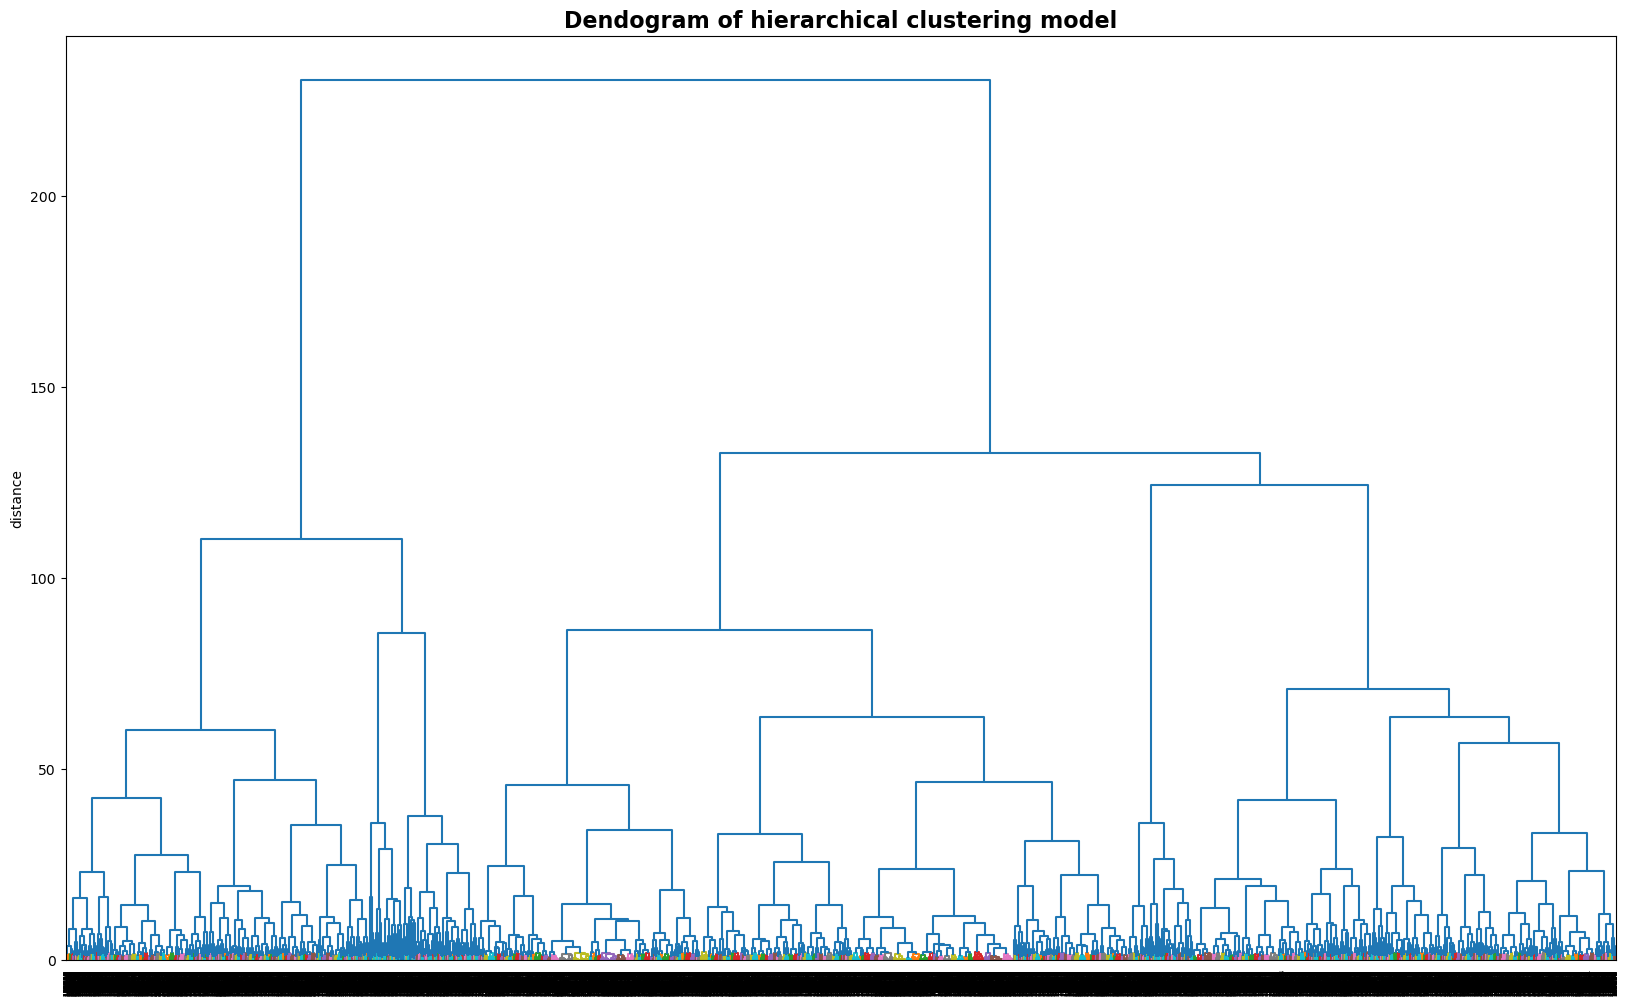

In [89]:
fig, ax = plt.subplots(figsize = (20, 12))
sch.dendrogram(Z, labels = hierarchical_data.index, ax = ax, color_threshold = 2)
plt.xticks(rotation = 90)
ax.set_ylabel('distance')
plt.title('Dendogram of hierarchical clustering model', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()

#### **`Training Agglomerative Hierarchical clustering model`**

In [90]:
# create clusters
hierarchical_model = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_pred = hierarchical_model.fit_predict(hierarchical_data)

#### **`Assigning clusters (output of Agglomerative Hierarchical clustering model) to the datapoints`**

In [91]:
hierarchical_data['label'] = y_pred

#### **`Scaling the data back to the original scale to understand the pattern in clusters output by Agglomerative Hierarchical Clustering model`**

In [92]:
hierarchical_data[['ctc', 'experience_in_years']] = scaler_2.inverse_transform(hierarchical_data[['ctc', 'experience_in_years']])
hierarchical_data['job_position'] = scaler.inverse_transform(hierarchical_data[['job_position']]).flatten()
hierarchical_data['job_position'] = le_job_position.inverse_transform(hierarchical_data['job_position'].astype('int64'))

## **`Let's check pattern in few of the clusters output by Agglomerative Hierarchical clustering algorithm`**

### **`Cluster 1:`**
- #### **`1. CTC: Median CTC = 1800000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 5 years`**
- #### **`4. Designation: Most Frequent Designation is 1`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 2:`**
- #### **`1. CTC: Median CTC = 800000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 3 years`**
- #### **`4. Designation: Most Frequent Designation is 3`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 3:`**
- #### **`1. CTC: Median CTC = 840000`** 
- #### **`2. Job Position: Most Frequent Job Position is Missing`** 
- #### **`3. Work Experience: Median work experience is 4 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 4:`**
- #### **`1. CTC: Median CTC = 880000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 4 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 2`** 

### **`Cluster 5:`**
- #### **`1. CTC: Median CTC = 2800000`** 
- #### **`2. Job Position: Most Frequent Job Position is Engineering Leadership`** 
- #### **`3. Work Experience: Median work experience is 14 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 6:`**
- #### **`1. CTC: Median CTC = 550000`** 
- #### **`2. Job Position: Most Frequent Job Position is Missing`** 
- #### **`3. Work Experience: Median work experience is 2 years`**
- #### **`4. Designation: Most Frequent Designation is 3`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 7:`**
- #### **`1. CTC: Median CTC = 6000000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 6 years`**
- #### **`4. Designation: Most Frequent Designation is 1`** 
- #### **`5. Class: Most Frequent Class is 1`** 
- #### **`6. Tier: Most Frequent Tier is 1`** 

### **`Cluster 8:`**
- #### **`1. CTC: Median CTC = 700000`** 
- #### **`2. Job Position: Most Frequent Job Position is Support Engineer`** 
- #### **`3. Work Experience: Median work experience is 5 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

### **`Cluster 9:`**
- #### **`1. CTC: Median CTC = 1019999`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 10 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 2`** 
- #### **`6. Tier: Most Frequent Tier is 2`** 

### **`Cluster 10:`**
- #### **`1. CTC: Median CTC = 750000`** 
- #### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- #### **`3. Work Experience: Median work experience is 2 years`**
- #### **`4. Designation: Most Frequent Designation is 2`** 
- #### **`5. Class: Most Frequent Class is 3`** 
- #### **`6. Tier: Most Frequent Tier is 3`** 

In [107]:
hierarchical_cluster_agg = hierarchical_data.groupby('label').agg({'ctc': 'median', 'job_position': mode, 'experience_in_years': 'median', 
                                                       'designation': mode, 'class': mode, 'tier': mode})
hierarchical_cluster_agg.columns = ['Median ctc', 'Most Frequent Job Position', 'Median Work Experience',
                              'Most Frequent Designation', 'Most Frequent Class', 'Most Frequent Tier']
hierarchical_cluster_agg.index.name = 'Cluster'
hierarchical_cluster_agg.index += 1
hierarchical_cluster_agg

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,1800000.0,Backend Engineer,5.0,1,1,1
2,800000.0,Backend Engineer,3.0,3,3,3
3,840000.0,Missing,4.0,2,2,3
4,880000.0,Backend Engineer,4.0,2,2,2
5,2800000.0,Engineering Leadership,14.0,2,1,1
6,550000.0,Missing,2.0,3,3,3
7,6000000.0,Backend Engineer,6.0,1,1,1
8,700000.0,Support Engineer,5.0,2,2,3
9,1019999.0,Backend Engineer,10.0,2,2,2


In [108]:
hierarchical_cluster_agg_std = deepcopy(hierarchical_cluster_agg)
hierarchical_cluster_agg_std[['Median ctc', 'Median Work Experience']] = scaler_2.fit_transform(hierarchical_cluster_agg_std[['Median ctc', 'Median Work Experience']])
hierarchical_cluster_agg_std

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,0.116374,Backend Engineer,-0.139482,1,1,1
2,-0.509293,Backend Engineer,-0.697410,3,3,3
3,-0.484266,Missing,-0.418446,2,2,3
4,-0.459240,Backend Engineer,-0.418446,2,2,2
5,0.742041,Engineering Leadership,2.371195,2,1,1
6,-0.665710,Missing,-0.976375,3,3,3
7,2.744176,Backend Engineer,0.139482,1,1,1
8,-0.571860,Support Engineer,-0.139482,2,2,3
9,-0.371647,Backend Engineer,1.255339,2,2,2


### **`As we can see that K-means and Agglomerative Hierarchical Clustering models are doing okayish job because the data has both numerical & categorical features. Both of these algorithms use Euclidean or other distance based algorithms which only make sense for the numerical continuous data. So we'll use an algorithm called "K-Prototypes" which is ideal for mixed data types. "K-Prototypes" is the combination of "K-means" (which works for numerical data) and "K-modes" (which works for categorical data). It uses Euclidean distance (or any other distance based measure) for numerical features and Dissimilarity function (used by the kmodes algorithm) for categorical features.`**

## **`K-Prototypes`**

In [94]:
! pip install kmodes
from kmodes.kprototypes import KPrototypes

In [95]:
kprototypes_data = deepcopy(new_df2)

In [96]:
kprototypes_data['job_position'] = new_df['job_position']

#### **`Standardizing the columns "designation", "class" & "tier"`**

In [97]:
scaler_3 = StandardScaler()
kprototypes_data[['designation', 'class', 'tier']] = scaler_3.fit_transform(kprototypes_data[['designation', 'class', 'tier']])

#### **`Trying several values of K (number of clusters) to train K-Prototypes clustering model and storing their corresponding cost (analogous to inertia) in a Python list`**

In [98]:
kprototype_models = []
kprototype_costs = []
kprototype_k = list(range(2, 21))
for k in kprototype_k:
    prototype = KPrototypes(n_clusters = k, max_iter = 20, n_jobs = -1)
    prototype.fit(kprototypes_data, categorical = [1])
    kprototype_models.append(prototype)
    kprototype_costs.append(prototype.cost_)

### **`Elbow Method --> To find out the optimum value of number of clusters`**

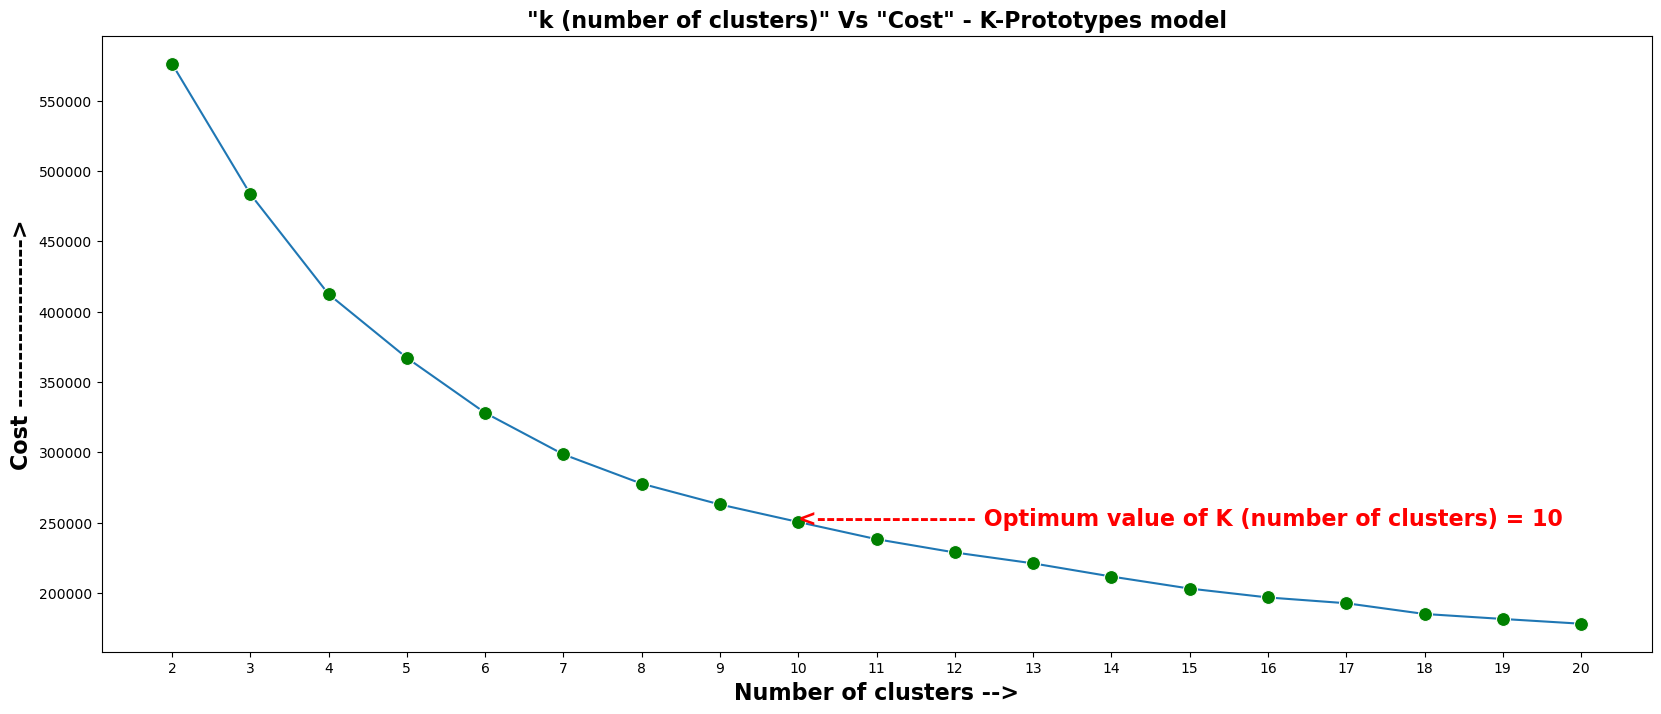

In [99]:
plt.figure(figsize = (20, 8))
sns.lineplot(x = kprototype_k, y = kprototype_costs, marker = 'o', markersize=10, markerfacecolor='green')
plt.ylabel('Cost ------------------>', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xlabel('Number of clusters -->', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.text(x = 10, y = 248000, s = f'<----------------- Optimum value of K (number of clusters) = 10', color = 'r', weight = 'bold', fontdict = {'size': 16})
plt.title('"k (number of clusters)" Vs "Cost" - K-Prototypes model', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.xticks(kprototype_k)
plt.show()

### **`K-Prototypes model with number of clusters = 10`**

In [100]:
kprototypes_k_10_model = kprototype_models[8]
kprototypes_k_10_model

KPrototypes(gamma=0.5, max_iter=20, n_clusters=10, n_jobs=-1)

#### **`Assigning clusters (output of Agglomerative Hierarchical clustering model) to the datapoints`**

In [101]:
kprototypes_data['label'] = kprototypes_k_10_model.labels_

#### **`Scaling the data back to the original scale to understand the pattern in clusters output by K-Prototypes Clustering model`**

In [102]:
kprototypes_data[['designation', 'class', 'tier']] = scaler_3.inverse_transform(kprototypes_data[['designation', 'class', 'tier']])
kprototypes_data[['ctc', 'experience_in_years']] = scaler_2.inverse_transform(kprototypes_data[['ctc', 'experience_in_years']])

In [103]:
kprototypes_cluster_agg = kprototypes_data.groupby('label').agg({'ctc': 'median', 'job_position': mode, 'experience_in_years': 'median', 
                                                       'designation': mode, 'class': mode, 'tier': mode})
kprototypes_cluster_agg.columns = ['Median ctc', 'Most Frequent Job Position', 'Median Work Experience',
                              'Most Frequent Designation', 'Most Frequent Class', 'Most Frequent Tier']
kprototypes_cluster_agg.index.name = 'Cluster'
kprototypes_cluster_agg.index += 1
kprototypes_cluster_agg

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,3800000.0,Backend Engineer,6.0,1.0,1.0,1.0
2,2940000.0,Engineering Leadership,15.0,2.0,1.0,1.0
3,800000.0,Backend Engineer,4.0,2.0,2.0,3.0
4,600000.0,Backend Engineer,3.0,3.0,3.0,3.0
5,750000.0,Backend Engineer,3.0,2.0,2.0,2.0
6,1130000.0,Engineering Leadership,10.0,2.0,2.0,2.0
7,1700000.0,Backend Engineer,7.0,2.0,1.0,1.0
8,1500000.0,Backend Engineer,3.0,1.0,1.0,1.0
9,800000.0,Backend Engineer,3.0,2.0,3.0,3.0


In [104]:
kprototypes_cluster_agg_std = deepcopy(kprototypes_cluster_agg)
kprototypes_cluster_agg_std[['Median ctc', 'Median Work Experience']] = scaler_2.fit_transform(kprototypes_cluster_agg_std[['Median ctc', 'Median Work Experience']])
kprototypes_cluster_agg_std

,Median ctc,Most Frequent Job Position,Median Work Experience,Most Frequent Designation,Most Frequent Class,Most Frequent Tier
Cluster,,,,,,
1,0.735423,Backend Engineer,-0.026832,1.0,1.0,1.0
2,0.339638,Engineering Leadership,2.388025,2.0,1.0,1.0
3,-0.645221,Backend Engineer,-0.563467,2.0,2.0,3.0
4,-0.737263,Backend Engineer,-0.831784,3.0,3.0,3.0
5,-0.668231,Backend Engineer,-0.831784,2.0,2.0,2.0
6,-0.493350,Engineering Leadership,1.046438,2.0,2.0,2.0
7,-0.231028,Backend Engineer,0.241486,2.0,1.0,1.0
8,-0.323070,Backend Engineer,-0.831784,1.0,1.0,1.0
9,-0.645221,Backend Engineer,-0.831784,2.0,3.0,3.0


## **`Insights & Recommendations:`**

### **`Cluster 1:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 3800000 (High)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 6 years (Medium)`**
- ##### **`4. Designation: Most Frequent Designation is 1 (Outperformer)`** 
- ##### **`5. Class: Most Frequent Class is 1 (Outperformer)`** 
- ##### **`6. Tier: Most Frequent Tier is 1 (Outperformer)`** 

#### **`Recommendations:`**
- ##### **` As most of the learners in "Cluster 1" are exemplary performers (Backend Engineer) with median work experience of 6 years and CTC greater than the average of their company having same years of experience, average of the people at the same job position and even greater than the company average, therefore we recommend to map such learners to the top tech giants who value such talents.`**

### **`Cluster 2:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 2940000 (Medium)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Engineering Leadership`** 
- ##### **`3. Work Experience: Median work experience is 15 years (High)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 1 (Outperformer)`** 
- ##### **`6. Tier: Most Frequent Tier is 1 (Outperformer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 2" are Engineering leadership with median work experience of 15 years and CTC equal to the average of their company having same years of experience, more than the average of the people at the same job position and even greater than the company average which means for same years of experience, there are people in the same company who have more CTC than Engineering Leadership in "Cluster 2". So we'll try to map such experienced people to the companies who want people having such rich experience`**

### **`Cluster 3:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 800000 (Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 4 years (Low)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 2 (Medium Performer)`** 
- ##### **`6. Tier: Most Frequent Tier is 3 (Low Performer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 3" are low to medium performers (Backend Engineer) with median work experience of 4 years and CTC equal to the average of their company having same years of experience, equal to the average of the people at the same job position and less than the company average. From this, we can clearly infer that the learners in "Cluster 3" are mostly newbies with lesser experience but for the same years of experience, they are performing just average. So we'll aim to upskill such learners and map them to the companies who are looking for less experienced but really good candidates.`**

### **`Cluster 4:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 600000 (Very Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 3 years (Very Low)`**
- ##### **`4. Designation: Most Frequent Designation is 3 (Low Performer)`** 
- ##### **`5. Class: Most Frequent Class is 3 (Low Performer)`** 
- ##### **`6. Tier: Most Frequent Tier is 3 (Low Performer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 4" are very low performers (Backend Engineer) with median work experience of 3 years and CTC less than the average of their company having same years of experience, average of the people at the same job position and less than the company average too. From this, we can clearly infer that the learners in "Cluster 4" are mostly newbies with lesser experience but for the same years of experience or for the same job position, they are performing very poor. So we'll aim to upskill such learners and map them to the companies who are looking for less experienced but really good candidates. If we are able to get these learners a good jump, then their testimonials can be a really good tool for our marketing`**


### **`Cluster 5:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 750000 (Very Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 3 years (Very Low)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 2 (Medium Performer)`** 
- ##### **`6. Tier: Most Frequent Tier is 2 (Medium Performer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 5" are low to medium performers (Backend Engineer) with median work experience of 3 years and CTC equal to the average of their company having same years of experience, average of the people at the same job position and the company average too. From this, we can clearly infer that the learners in "Cluster 5" are learners with lesser experience but for the same years of experience or for the same job position, they are performing just average. So we'll aim to upskill such learners but we'll also try to develop negotiation skills in them.`**

### **`Cluster 6:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 1130000 (Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Engineering Leadership`** 
- ##### **`3. Work Experience: Median work experience is 10 years (High)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 2 (Medium Performer)`** 
- ##### **`6. Tier: Most Frequent Tier is 2 (Medium Performer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 6" are Engineering leadership with median work experience of 10 years and CTC equal to the average of their company having same years of experience, the average of the people at the same job position and the company average too which means for same years of experience, thes learners are doing just okay". Being in leadership, 10 years of experience is on the lower side. So we'll suggest these learners to have some more experience and upskill at the same time.`**

### **`Cluster 7:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 1700000 (Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 7 years (Medium)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 1 (Outperformer)`** 
- ##### **`6. Tier: Most Frequent Tier is 1 (Outperformer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 7" are medium performers (Backend Engineer) with median work experience of 7 years and CTC equal to the average of their company having same years of experience, more than the average of the people at the same job position and more than the company average too. From this, we can clearly infer that the learners in "Cluster 7" are learners with moderate experience but for the same years of experience or for the same job position, they are performing just average but in respect to the job position, they are performing really good. This means that their company is not valuing them enough as per their job profile and work experience. So we'll suggest such learners to look for an organization change.`**

### **`Cluster 8:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 1500000 (Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 3 years (Very Low)`**
- ##### **`4. Designation: Most Frequent Designation is 1 (Outperformer)`** 
- ##### **`5. Class: Most Frequent Class is 1 (Outperformer)`** 
- ##### **`6. Tier: Most Frequent Tier is 1 (Outperformer)`** 

#### **`Recommendations:`**
- ##### **` As most of the learners in "Cluster 8" are exemplary performers (Backend Engineer) with median work experience of 3 years and CTC greater than the average of their company having same years of experience, average of the people at the same job position and even greater than the company average, therefore we recommend to map such learners to the top tech giants who are looking for such young talented candidates.`**

### **`Cluster 9:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 800000 (Very Low)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 3 years (Very Low)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 3 (Low Performer)`** 
- ##### **`6. Tier: Most Frequent Tier is 3 (Low Performer)`** 

#### **`Recommendations:`**
- ##### **` Most of the learners in "Cluster 9" are low to medium performers (Backend Engineer) with median work experience of 3 years and CTC equal to the average of their company having same years of experience, less than the average of the people at the same job position and less than the company average too. From this, we can clearly infer that the learners in "Cluster 9" are learners with lesser experience but for the same years of experience or for the same job position, they are performing just average. So we'll aim to upskill such learners but we'll also try to develop negotiation skills in them.`**

### **`Cluster 10:`**

#### **`Insights:`**
- ##### **`1. CTC: Median CTC = 8000000 (Very High)`** 
- ##### **`2. Job Position: Most Frequent Job Position is Backend Engineer`** 
- ##### **`3. Work Experience: Median work experience is 7 years (Medium)`**
- ##### **`4. Designation: Most Frequent Designation is 2 (Medium Performer)`** 
- ##### **`5. Class: Most Frequent Class is 1 (Outperformer)`** 
- ##### **`6. Tier: Most Frequent Tier is 1 (Outperformer)`** 

#### **`Recommendations:`**
- ##### **` As most of the learners in "Cluster 10" are excellent performers (Backend Engineer) with median work experience of 7 years and CTC equal to the average of their company having same years of experience, more than the average of the people at the same job position and even greater than the company average, therefore we recommend to map such learners to the top tech giants who value such talents.`**

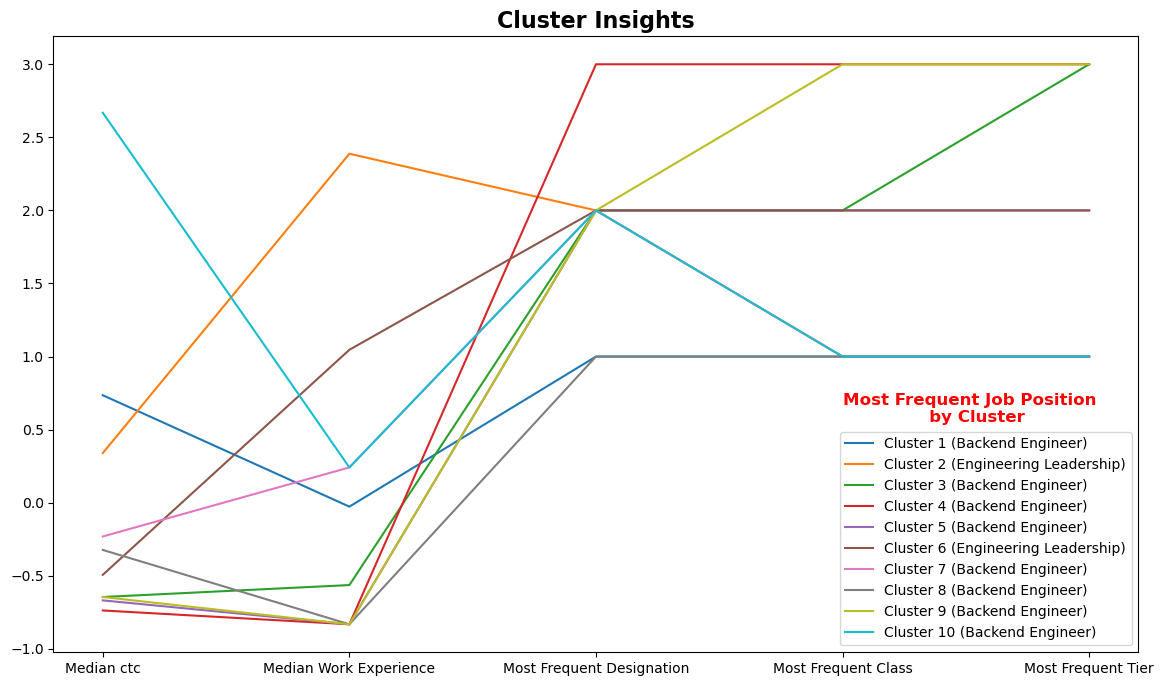

In [105]:
#Plot a line graph to see the characteristics of the clusters
labels = [f'Cluster {i} ({kprototypes_cluster_agg_std.loc[i, "Most Frequent Job Position"]})' for i in kprototypes_cluster_agg_std.index]
labels
plt.figure(figsize=(14,8))
plt.plot(kprototypes_cluster_agg_std.drop(columns = 'Most Frequent Job Position').T, label=labels)
plt.text(x = 3, y = 0.55, s = f'Most Frequent Job Position \n               by Cluster', color = 'r', weight = 'bold', fontdict = {'size': 12})
plt.legend(labels)
plt.title('Cluster Insights', fontdict = {'color':'black','size': 16, 'weight': 'bold'})
plt.show()